In [1]:
# -*- coding: utf-8 -*-
"""
Created on 11/15/2018
1. Reads from csv file from the GCaMP imaging data
2. Generates two figures 
   a) raw neuron, raw background, subtracted neuron
   b) deltaF/F0 

@author: Heeun Jang

Adapted by Andrew Rodriguez for individual use
"""

import numpy as np
import pandas as pd
#import scipy as sc
import matplotlib.pyplot as plt
#%matplotlib inline
#import os
import glob
import seaborn as sns
import math

# Makes the image background solid white for all plots
plt.rcParams.update({
    "figure.facecolor":  (1.0, 1.0, 1.0, 1.0),  # white with alpha = 100%
    "axes.facecolor":    (1.0, 1.0, 1.0, 1.0),  # white with alpha = 100%
    "savefig.facecolor": (1.0, 1.0, 1.0, 1.0),  # white with alpha = 100%
})

## Edit here for each experiment 
total_sec = 20  
frames_per_sec = 2
stimulus_start_time = 5 # if stimulus turned on after 5 seconds, for example, put 5
stimulus_end_time = 15 # if stimulus turned off after 35 seconds, for example, put 35
frames = np.arange(0, total_sec*frames_per_sec)
# Create a dictionary with key = eid, value = dataframe from each experiment.
directory = r"C:\Users\arodriguez\Documents\Python\Quantification"
extension = ".xlsx"
add_to_filename = "Merged"              
all_files = glob.glob(directory + "/*" + extension)
file_list = [] 
df_raw = {} # Dictionary of keys = file name, values = dataframe of raw csv.

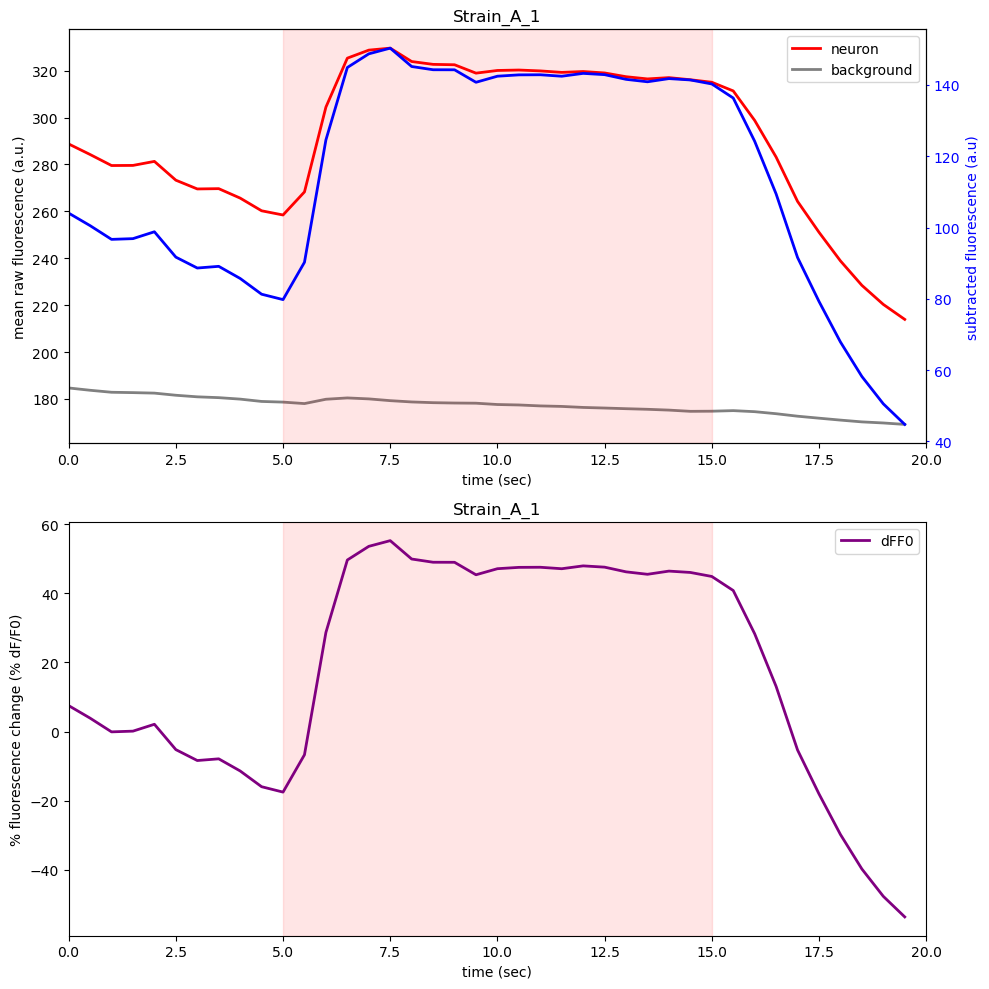

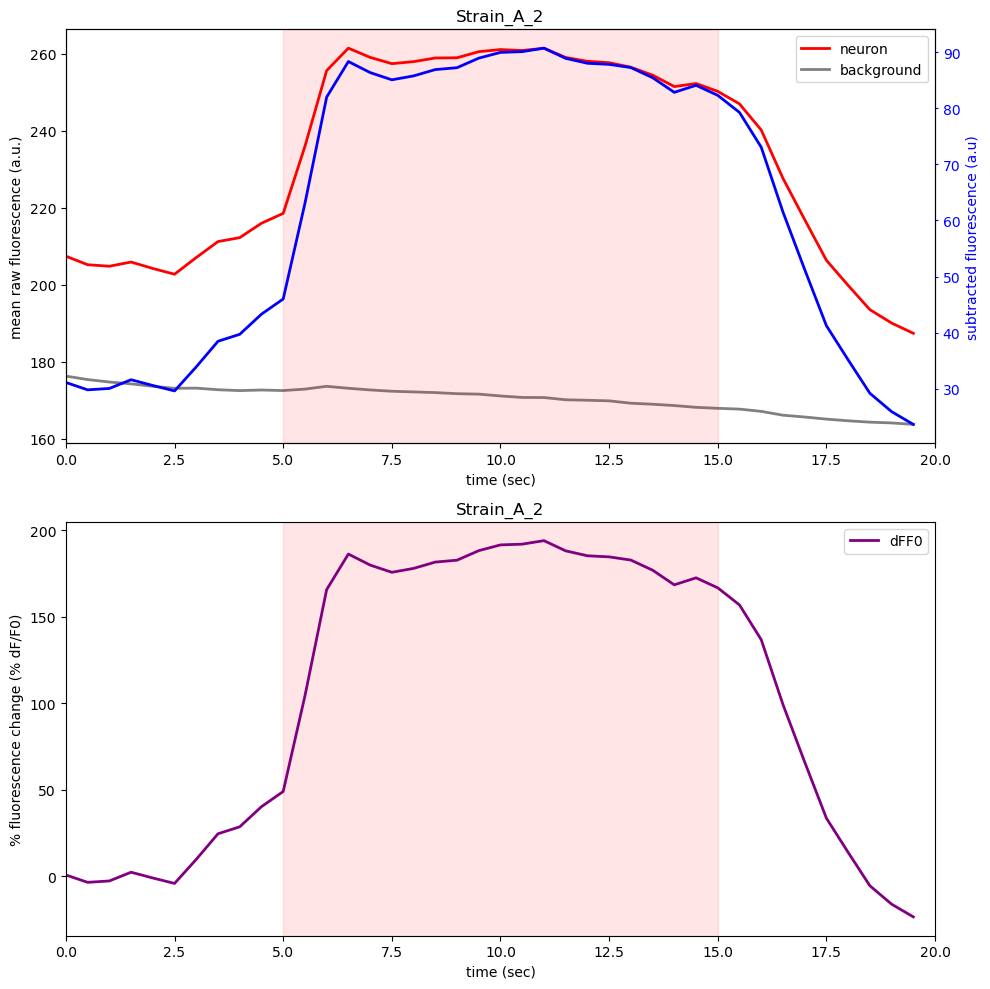

C:\Users\arodriguez\AppData\Local\Temp\ipykernel_61172\1110984910.py:78: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_time_peak                = df_time_peak.append(df_time_peak_temp)
C:\Users\arodriguez\AppData\Local\Temp\ipykernel_61172\1110984910.py:79: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_dFF0_peak                = df_dFF0_peak.append(df_dFF0_peak_temp)


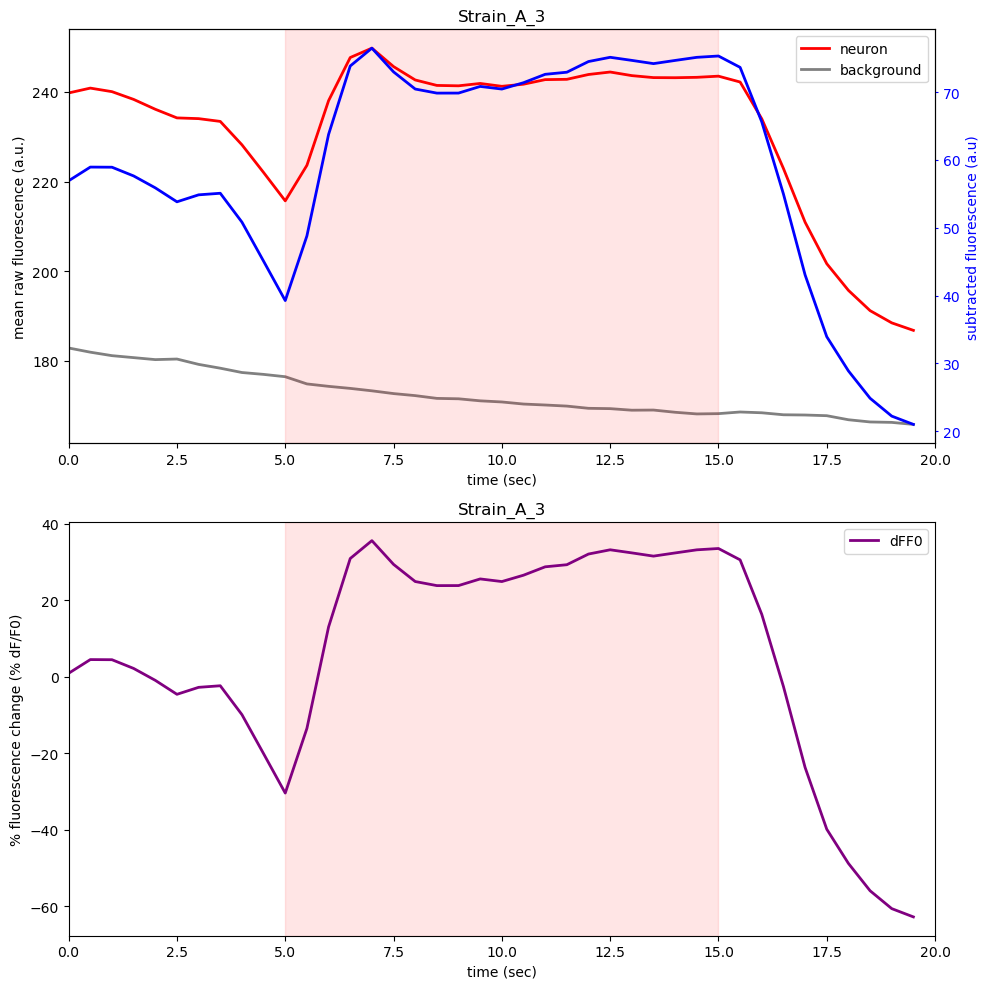

C:\Users\arodriguez\AppData\Local\Temp\ipykernel_61172\1110984910.py:78: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_time_peak                = df_time_peak.append(df_time_peak_temp)
C:\Users\arodriguez\AppData\Local\Temp\ipykernel_61172\1110984910.py:79: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_dFF0_peak                = df_dFF0_peak.append(df_dFF0_peak_temp)


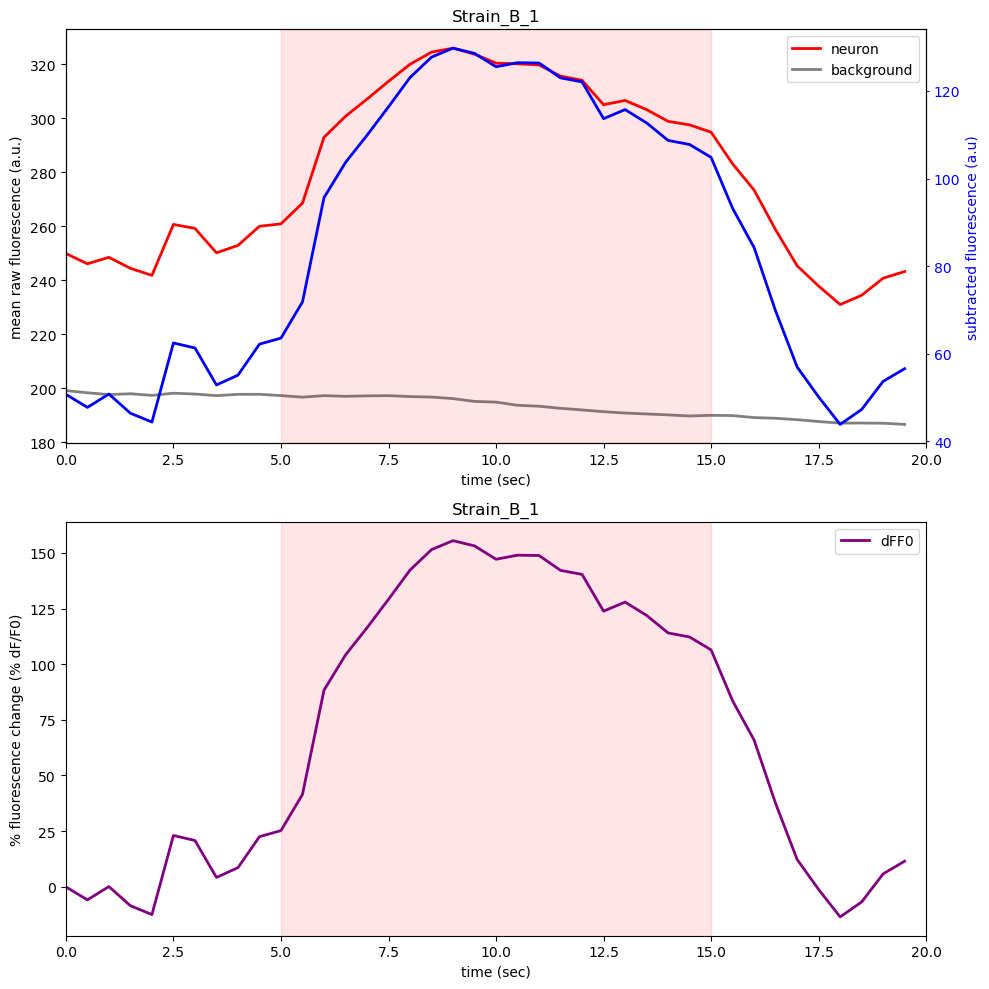

C:\Users\arodriguez\AppData\Local\Temp\ipykernel_61172\1110984910.py:78: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_time_peak                = df_time_peak.append(df_time_peak_temp)
C:\Users\arodriguez\AppData\Local\Temp\ipykernel_61172\1110984910.py:79: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_dFF0_peak                = df_dFF0_peak.append(df_dFF0_peak_temp)


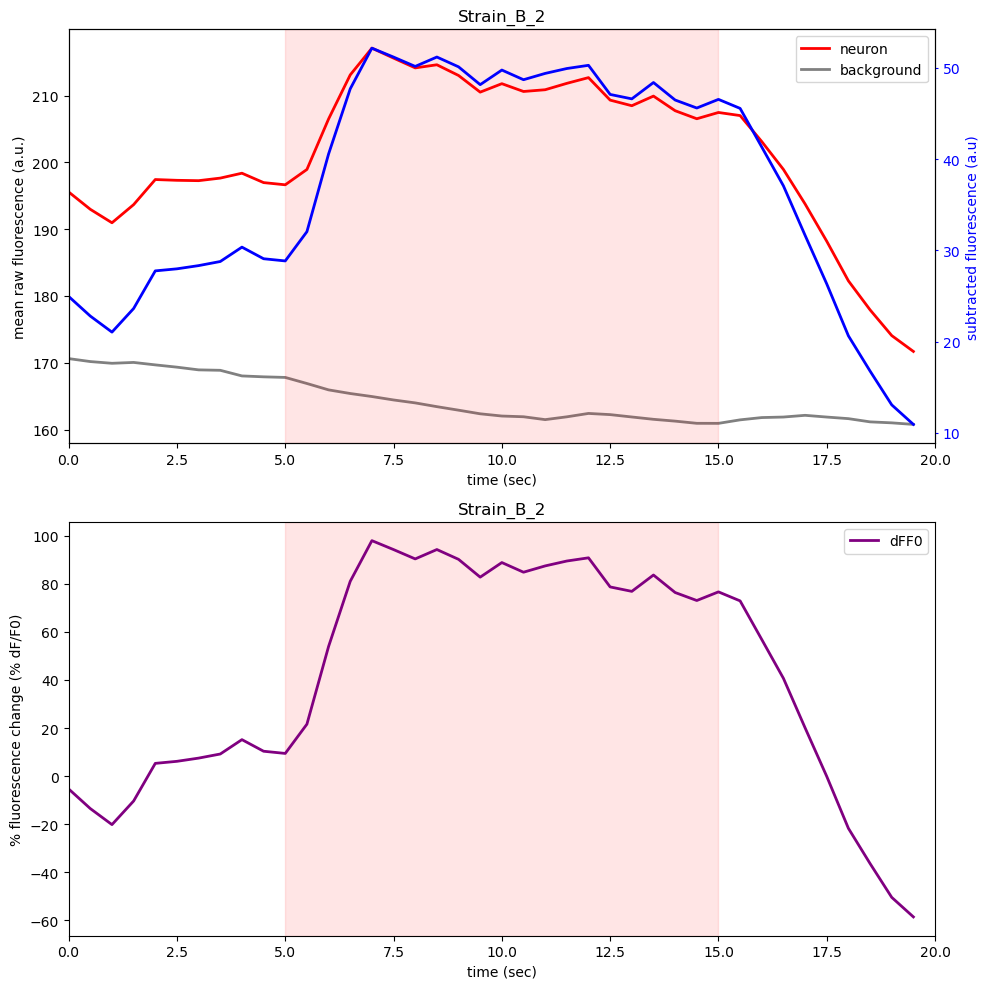

C:\Users\arodriguez\AppData\Local\Temp\ipykernel_61172\1110984910.py:78: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_time_peak                = df_time_peak.append(df_time_peak_temp)
C:\Users\arodriguez\AppData\Local\Temp\ipykernel_61172\1110984910.py:79: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_dFF0_peak                = df_dFF0_peak.append(df_dFF0_peak_temp)


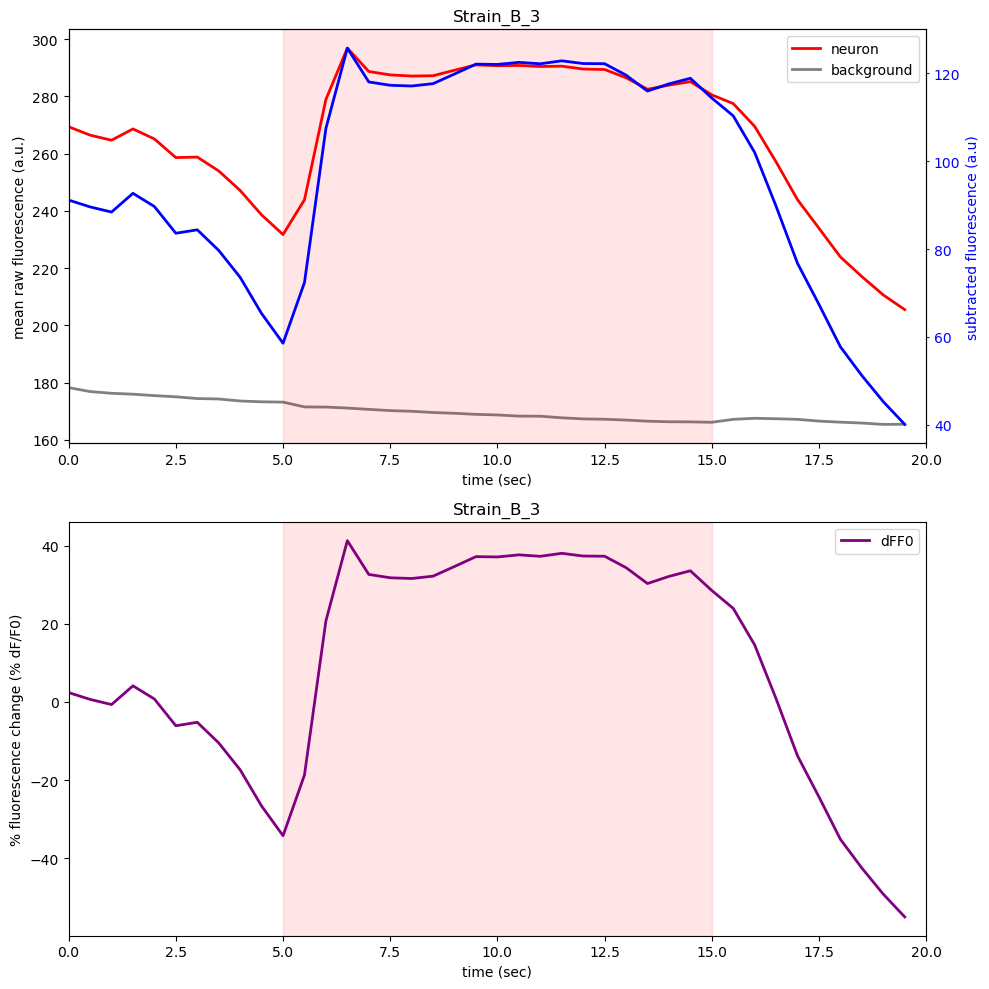

C:\Users\arodriguez\AppData\Local\Temp\ipykernel_61172\1110984910.py:78: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_time_peak                = df_time_peak.append(df_time_peak_temp)
C:\Users\arodriguez\AppData\Local\Temp\ipykernel_61172\1110984910.py:79: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_dFF0_peak                = df_dFF0_peak.append(df_dFF0_peak_temp)


In [2]:
## Go through each file in the directory to get data
for i, file_name in enumerate (all_files):
    file_name_cut = file_name[(len(directory)+1):(len(file_name) - len(extension))]
    file_list.append(file_name_cut)
    
    df_raw[file_name_cut] = pd.read_excel(file_name, index_col=None, header=0)
    
#    frame           = np.array(df_raw[file_name_cut]["frame"])
    # Reads the 6 total recordings for each file (3 of neuron, 3 of background)
    neuron_A          = np.array(df_raw[file_name_cut]["neuron_A"])
    background_A      = np.array(df_raw[file_name_cut]["background_A"])
    neuron_B          = np.array(df_raw[file_name_cut]["neuron_B"])
    background_B      = np.array(df_raw[file_name_cut]["background_B"])
    neuron_C          = np.array(df_raw[file_name_cut]["neuron_C"])
    background_C      = np.array(df_raw[file_name_cut]["background_C"])
    neuron = np.mean(np.array([neuron_A, neuron_B, neuron_C]), axis=0) # averages the 3 neuron recordings
    background = np.mean(np.array([background_A, background_B, background_C]), axis=0) # averages the 3 background recordings
#    neuron          = neuron[:300] ## REMOVED BY ANDREW because I think this was to trim to 300 frames, no longer needed
#    background      = background[:300] ## REMOVED BY ANDREW because I think this was to trim to 300 frames, no longer needed
    
    subtract        = neuron - background
    F0              = np.median(subtract[0:((stimulus_start_time - 1) * frames_per_sec)]) # EDITED BY ANDREW
    # Above part used to say 40:49, I think capturing the 5 seconds of background before the stimulus. I am now only measuring
    # 5 seconds before the stimulus, so I am changing it to start at 0, and I only go to 4 seconds because the stimulus
    # might sometimes start slightly before 5s by mistake, and I don't want the start of the signal to be incorporated
    # into the baseline measurement
    dFF0            = (subtract - F0)/F0*100  
    
    # plot individual graphs    
    fig = plt.figure(figsize = (10,10))

    ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
    ax1.plot(frames/frames_per_sec, neuron, color = "red", linewidth = 2, label = "neuron")
    ax1.plot(frames/frames_per_sec, background, color = "grey", linewidth = 2, label = "background")
    ax1.set_ylabel("mean raw fluorescence (a.u.)")
    ax1.set_xlim(0, total_sec)
    ax1.set_xlabel("time (sec)")
    ax1.legend()
    ax1.set_title("%s" % file_name_cut)
    
    ax2 = ax1.twinx()
    ax2.plot(frames/frames_per_sec, subtract, color = "blue", linewidth = 2, label = "neuron, bg corrected")
    ax2.set_ylabel("subtracted fluorescence (a.u)", color = 'b')
    ax2.tick_params('y', colors='b', size = 2)
    plt.axvspan(stimulus_start_time, stimulus_end_time, color = "red", alpha=0.1)
    
    ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
    ax3.plot(frames/frames_per_sec, dFF0, color="purple", linewidth = 2, label = "dFF0")
    ax3.set_xlim(0, total_sec)
    ax3.legend()
    ax3.set_ylabel("% fluorescence change (% dF/F0)")
    ax3.set_xlabel("time (sec)")
    ax3.set_title("%s" % file_name_cut)
    plt.axvspan(stimulus_start_time, stimulus_end_time, color = "red", alpha=0.1)
    
    plt.tight_layout()
    save_file_path = directory + "/" + file_name_cut + ".png"
    plt.savefig(save_file_path, transparent=False)
    plt.show()
    
    dFF0        = list(dFF0)
    frame_list  = list(frames)
    max_index   = dFF0.index(max(dFF0))
    time_peak   = frame_list[max_index]/frames_per_sec
    dFF0_peak   = max(dFF0)   
       
    if i == 0:
        df_dFF0                     = pd.DataFrame(frames, columns = ["frame"])
        df_dFF0[file_name_cut]      = pd.Series(dFF0) 
        df_time_peak                = pd.Series([time_peak], index = [file_name_cut])
        df_dFF0_peak                = pd.Series([dFF0_peak], index = [file_name_cut])
        df_dFF0_scaled              = pd.DataFrame(dFF0/dFF0_peak, columns = [file_name_cut])

    else: 
        df_dFF0[file_name_cut]      = pd.Series(dFF0)
        df_time_peak_temp           = pd.Series([time_peak], index = [file_name_cut])
        df_dFF0_peak_temp           = pd.Series([dFF0_peak], index = [file_name_cut])
        df_time_peak                = df_time_peak.append(df_time_peak_temp)
        df_dFF0_peak                = df_dFF0_peak.append(df_dFF0_peak_temp)
        df_dFF0_scaled[file_name_cut] = pd.Series(dFF0/dFF0_peak)
    

In [3]:
## Re-arrange the dataframe according to the peak value
df_dFF0_peak_sorted = df_dFF0_peak.sort_values(ascending = False)

for i, file_name_cut in enumerate(df_dFF0_peak_sorted.index):
    if i ==0:
        df_dFF0_heatmap_sorted = pd.DataFrame(df_dFF0[file_name_cut], columns = [file_name_cut])
        df_dFF0_scaled_sorted  = pd.DataFrame(df_dFF0_scaled[file_name_cut], columns = [file_name_cut])
    else:
        df_dFF0_heatmap_sorted[file_name_cut] = pd.Series(df_dFF0[file_name_cut])
        df_dFF0_scaled_sorted[file_name_cut]  = pd.Series(df_dFF0_scaled[file_name_cut])
## df_dFF0_heatmap = df_dFF0.drop(columns=["frame"])        
df_dFF0_heatmap_sorted = df_dFF0_heatmap_sorted.T      
df_dFF0_scaled_sorted  = df_dFF0_scaled_sorted.T

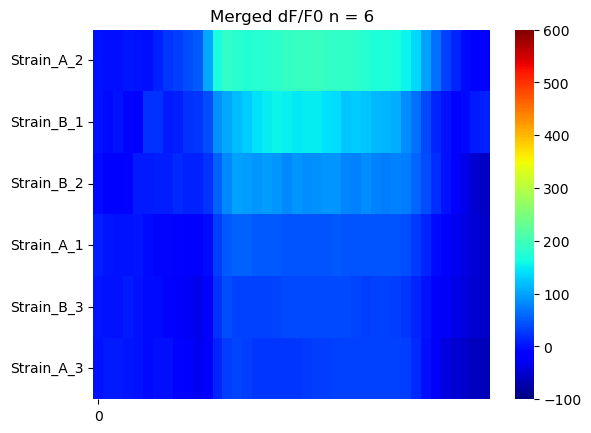

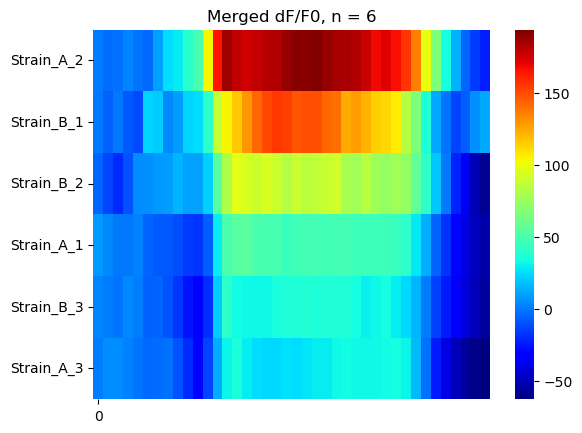

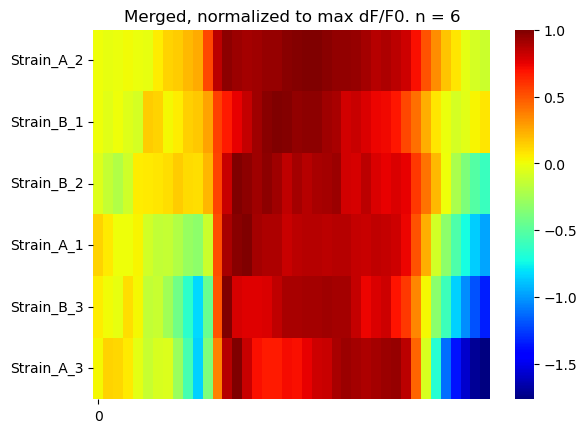

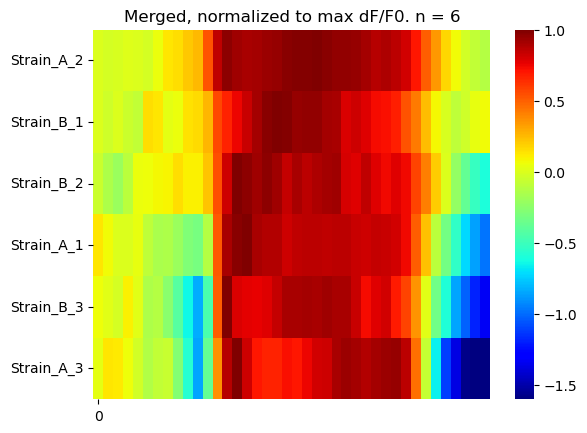

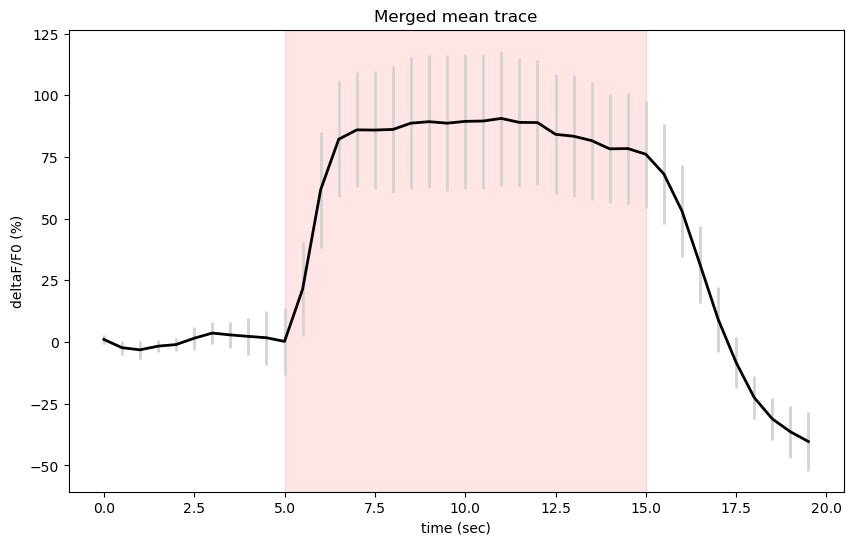

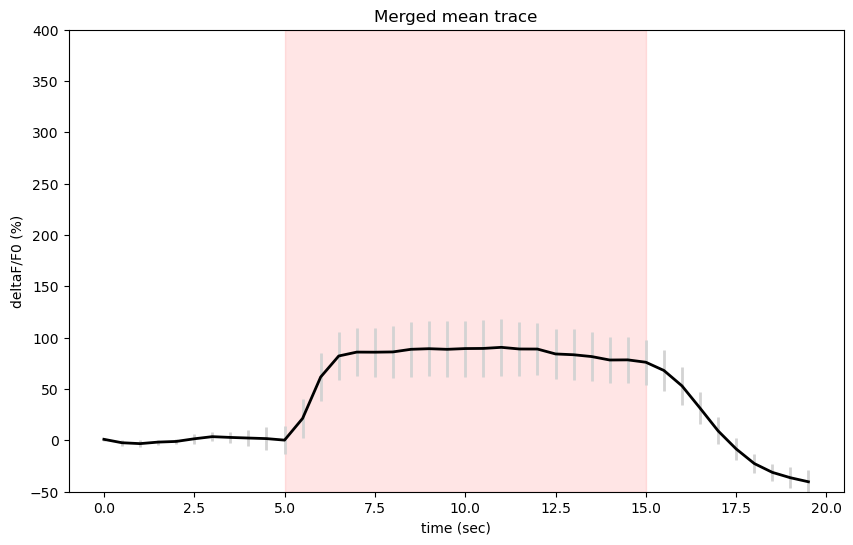

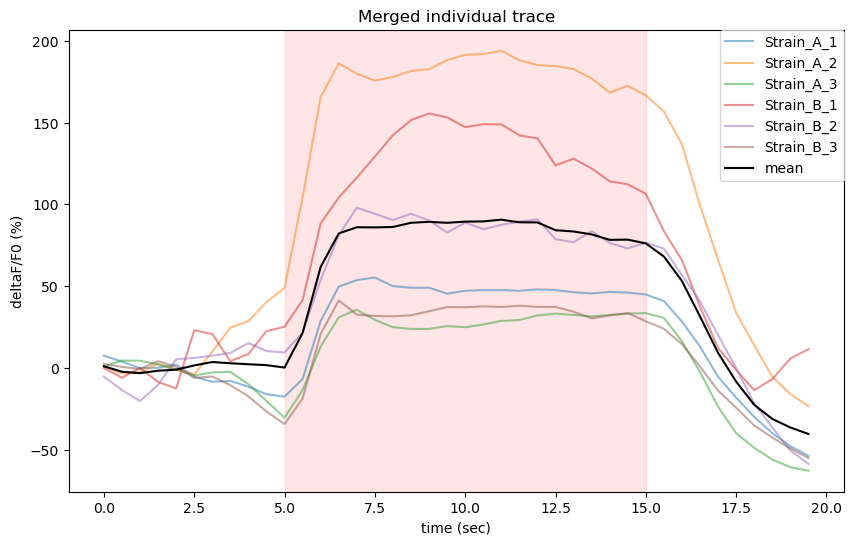

In [4]:
## Heatmap same scale
ax11 = plt.axes()
sns.heatmap(df_dFF0_heatmap_sorted, xticklabels = 50, yticklabels=True, cmap="jet", vmax=600, vmin=-100, ax = ax11)
ax11.set_title("%s dF/F0 n = %d" % (add_to_filename, (i+1)))
save_file_path = directory + "/" + add_to_filename + "_heatmap_same_scale.png"
figure = ax11.get_figure() 
figure.savefig(save_file_path, dpi=1200)
plt.show()

## Heatmap autorange
ax12 = plt.axes()
sns.heatmap(df_dFF0_heatmap_sorted, xticklabels = 50, yticklabels=True, cmap="jet", ax = ax12)
ax12.set_title("%s dF/F0, n = %d" % (add_to_filename, (i+1)))
save_file_path = directory + "/" + add_to_filename + "_heatmap_autorange.png"
figure = ax12.get_figure() 
figure.savefig(save_file_path, dpi=1200)
plt.show()

## Heatmap normalized to max value, autorange
ax13 = plt.axes()
sns.heatmap(df_dFF0_scaled_sorted, xticklabels = 50, yticklabels=True, cmap="jet")
ax13.set_title("%s, normalized to max dF/F0. n = %d" % (add_to_filename, (i+1)))
save_file_path = directory + "/" + add_to_filename + "_heatmap_normalized_aurorange.png"
figure = ax13.get_figure() 
figure.savefig(save_file_path, dpi=1200)
plt.show()

## Heatmap normalized to max value, same scale
ax14 = plt.axes()
sns.heatmap(df_dFF0_scaled_sorted, xticklabels = 50, yticklabels=True, cmap="jet", vmax = 1.0, vmin=-1.6)
ax14.set_title("%s, normalized to max dF/F0. n = %d" % (add_to_filename, (i+1)))
save_file_path = directory + "/" + add_to_filename + "_heatmap_normalized_same_scale.png"
figure = ax14.get_figure() 
figure.savefig(save_file_path, dpi=1200)
plt.show()


## Save csv files               
save_file_path   = directory  + "/" + add_to_filename + "_dFF0.csv"
df_dFF0.to_csv(save_file_path, index=False)
save_file_path   = directory  + "/" + add_to_filename + "_time_to_peak_sec.csv"
df_time_peak.to_csv(save_file_path, index=True)
save_file_path   = directory  + "/" + add_to_filename + "_dFF0_peak.csv"
df_dFF0_peak.to_csv(save_file_path, index=True)


# Calculate mean 
df_dFF0_values = df_dFF0.drop(columns=["frame"])
dFF0_mean      = df_dFF0_values.mean(axis=1)
dFF0_stderr    = df_dFF0_values.std(axis=1)
dFF0_stderr    = dFF0_stderr/math.sqrt(len(all_files))


## Figure of mean trace with standard error 
plt.figure(figsize = (10,6))
plt.errorbar(frames/frames_per_sec, dFF0_mean, dFF0_stderr, linewidth = 2, color = "black", ecolor = "lightgray")    
plt.xlabel("time (sec)")
plt.ylabel("deltaF/F0 (%)")
plt.title("%s mean trace" % add_to_filename)
plt.axvspan(stimulus_start_time, stimulus_end_time, color = "red", alpha=0.1)
save_file_path = directory + "/" + add_to_filename + "_mean_stderr_dFF0_autorange.png"
plt.savefig(save_file_path)
plt.show() 

## Figure of mean trace with standard error, same scale
plt.figure(figsize = (10,6))
plt.errorbar(frames/frames_per_sec, dFF0_mean, dFF0_stderr, linewidth = 2, color = "black", ecolor = "lightgray")    
plt.ylim(-50, 400)
plt.xlabel("time (sec)")
plt.ylabel("deltaF/F0 (%)")
plt.title("%s mean trace" % add_to_filename)
plt.axvspan(stimulus_start_time, stimulus_end_time, color = "red", alpha=0.1)
save_file_path = directory + "/" + add_to_filename + "_mean_stderr_dFF0_same_scale.png"
plt.savefig(save_file_path)
plt.show() 


## Figure of mean trace with individual traces
plt.figure(figsize = (10,6))
for i, file_name_cut in enumerate (file_list):      
    plt.plot(frames/frames_per_sec, df_dFF0[file_name_cut], alpha = 0.5)
plt.plot(frames/frames_per_sec, dFF0_mean, color = "black")    
plt.legend(file_list + ["mean"], loc='best', borderaxespad=0.)
plt.xlabel("time (sec)")
plt.ylabel("deltaF/F0 (%)")
plt.title("%s individual trace" % add_to_filename)
plt.axvspan(stimulus_start_time, stimulus_end_time, color = "red", alpha=0.1)
save_file_path = directory + "/" + add_to_filename + "_indiv_dFF0.png"
plt.savefig(save_file_path)
plt.show()